In [1]:
import numpy as np
import scipy as sc
A = np.array([[1,3,5],[2,5,1],[2,3,8]])
print(A)

[[1 3 5]
 [2 5 1]
 [2 3 8]]


In [2]:
b=np.array([[10],[8],[3]])
print(b)

[[10]
 [ 8]
 [ 3]]


In [3]:
C = sc.linalg.inv(A).dot(b)
print(C)

[[-9.28]
 [ 5.16]
 [ 0.76]]


In [4]:
D = sc.linalg.solve(A,b)
print(D)

[[-9.28]
 [ 5.16]
 [ 0.76]]


In [9]:
import numpy as np
from scipy.linalg import solve
A = np.array([[3,2],[1,2]])
b = np.array([1,0])
solution = solve(A,b)
solution

array([ 0.5 , -0.25])

In [25]:
def dydx(x,y):
    return((x-y)/2)

def rungeKutta(x0,y0,x,h):
    n=int((x-x0)/h)
    y=y0
    for i in range(1,n+1):
        k1=h*dydx(x0,y)
        k2=h*dydx(x0+0.5*h,y+0.5*k1)
        k3=h*dydx(x0+0.5*h,y+0.5*k2)
        k4=h*dydx(x0+h,y+k3)
        y=y+(1/6)*(k1+2*k2+2*k3+k4)
        x0=x0+h
    return y

x0=0
y=1
x=5
h=0.2

print('The value of y at x is: ', rungeKutta(x0,y,x,h))

The value of y at x is:  3.246255553543053


In [32]:
def dydx(x,y):
    return((x-y)/2)

def rungeKutta(x0,y0,x,h):
    n=int((x-x0)/h)
    y=y0
    for i in range(1,n+1):
        k1=dydx(x0,y)
        k2=dydx(x0+0.5*h,y+0.5*h*k1)
        k3=dydx(x0+0.5*h,y+0.5*h*k2)
        k4=dydx(x0+h,y+h*k3)
        y=y+(h/6)*(k1+2*k2+2*k3+k4)
        x0=x0+h
    return y

x0=0
y=1
x=5
h=0.2

print('The value of y at x is: ', rungeKutta(x0,y,x,h))

The value of y at x is:  3.2462555535430524


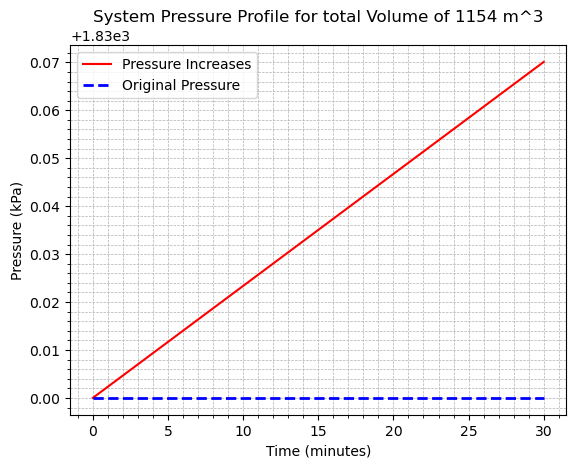

In [20]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

V=1154 #m3
R=8.314 #J/mol.K
T=120 #degC

mass_in =473220 #kg/hr
MW_in =56.6
mass_out =28742 #kg/hr
MW_out = 40.4

Tk=T+273.15
mol_in=mass_in/MW_in/60 # kmol/min
mol_out=mass_out/MW_out/60 #kmol/min

P0=1830 #kPa

def dPdt(P,t):
    dpdt=(mol_in-mol_out)/(V/R*Tk)
    return dpdt

start=0
end =30
t=np.linspace(start,end,end)
Pinitial=np.linspace(P0,P0,end)
P=sc.integrate.odeint(dPdt,P0,t)

plt.figure()
plt.plot(t,P,'r',label='Pressure Increases')
plt.plot(t,Pinitial,'b--',label='Original Pressure',linewidth=2)
plt.title(f'System Pressure Profile for total Volume of {V} m^3')
plt.xlabel('Time (minutes)')
plt.ylabel('Pressure (kPa)')
plt.grid(True, which='both',linestyle='--',linewidth=0.5)
plt.minorticks_on()
plt.legend()
plt.show()

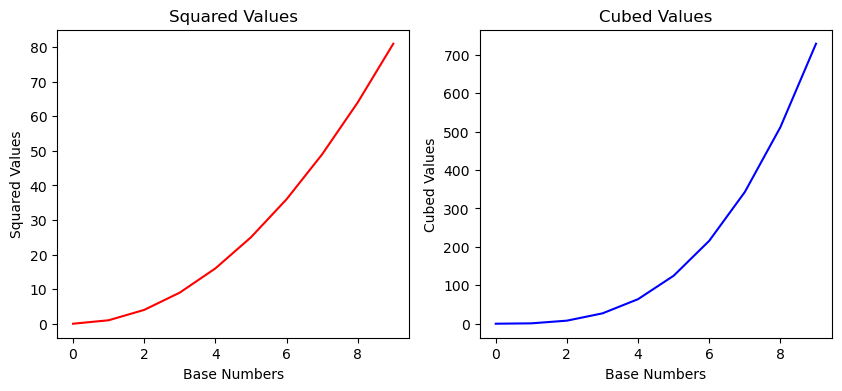

In [22]:
from matplotlib import pyplot as plt
import math

x=list(range(0,10))
y1=[math.pow(num,2)for num in x]
y2=[math.pow(num,3)for num in x]
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))

ax1.plot(x,y1,'r')
ax1.set_title('Squared Values')
ax1.set_xlabel('Base Numbers')
ax1.set_ylabel('Squared Values')

ax2.plot(x,y2,'b')
ax2.set_title('Cubed Values')
ax2.set_xlabel('Base Numbers')
ax2.set_ylabel('Cubed Values')

plt.show()

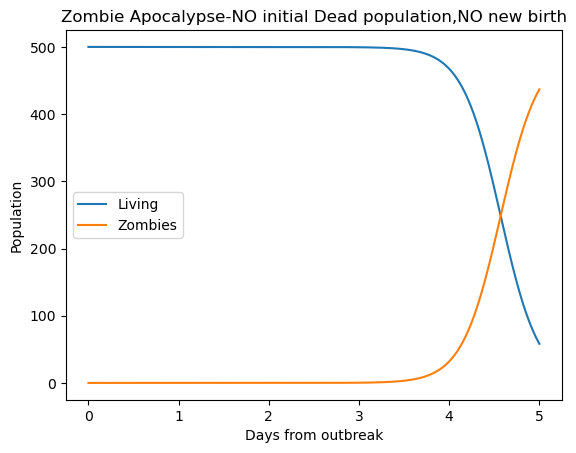

In [29]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from scipy.integrate import odeint

P=0 #population of birth rate
d=0.0001 #natural death percent
B=0.0095 #transmission percent to become zombie
G=0.0001 #percent of dead percent become zombie
A=0.0001 #zombie being destroy percent

def f(y,t):
    Si=y[0] # susceptible population
    Zi=y[1] # zombie population
    Ri=y[2] # Dead population
    f0=P-B*Si*Zi-d*Si #rate of change of susceptible populations
    f1=B*Si*Zi+G*Ri-A*Si*Zi #rate of change of zombie populations
    f2=d*Si+A*Si*Zi-G*Ri #rate of change of dead populations
    return [f0,f1,f2]

S0=500
Z0=0
R0=0
y0=[S0,Z0,R0]
t=np.linspace(0,5,1000)
soln = odeint(f,y0,t)
S=soln[:,0]
Z=soln[:,1]
R=soln[:,2]

plt.figure()
plt.plot(t,S,label='Living')
plt.plot(t,Z,label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse-NO initial Dead population,NO new birth')
plt.legend(loc=0)
plt.show()

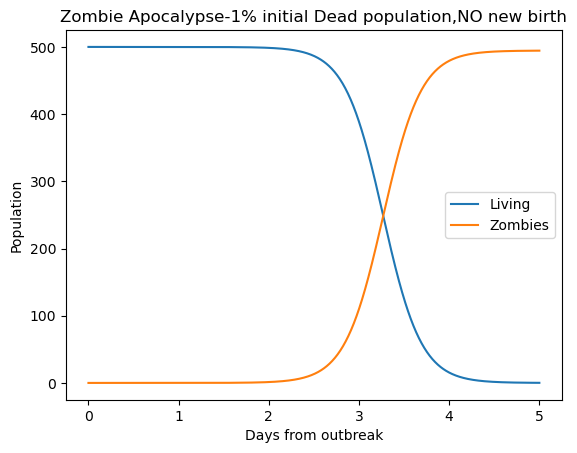

In [30]:
S0=500
Z0=0
R0=0.01*S0
y0=[S0,Z0,R0]
t=np.linspace(0,5,1000)
soln = odeint(f,y0,t)
S=soln[:,0]
Z=soln[:,1]
R=soln[:,2]

plt.figure()
plt.plot(t,S,label='Living')
plt.plot(t,Z,label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse-1% initial Dead population,NO new birth')
plt.legend(loc=0)
plt.show()

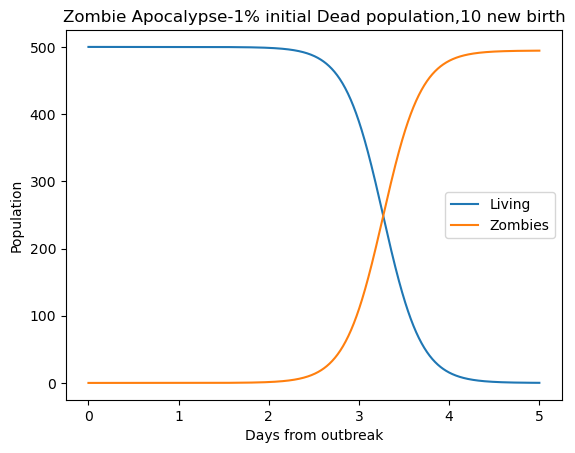

In [31]:
P=10
plt.figure()
plt.plot(t,S,label='Living')
plt.plot(t,Z,label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse-1% initial Dead population,10 new birth')
plt.legend(loc=0)
plt.show()